# Bias Variance Tradeoff

This notebook explores the bias-variance tradeoff in a regression problem. It includes creating datasets, fitting polynomial estimators, and analyzing the tradeoff between bias and variance.

## Overview
The key steps involve generating datasets, fitting polynomial estimators, plotting bias-variance tradeoff, and identifying the best model.

## Procedure
- **Dataset Generation**: Create a dataset with 20 points using the function \( f(x) = x + \sin(1.5x) \) and noise.
- **Polynomial Estimators**: Fit polynomial estimators \( g_1, g_3, g_5, g_{10} \) and evaluate their performance.
- **Bias-Variance Tradeoff**: Generate 100 datasets, fit models of varying complexity, and plot bias, variance, and error.
- **Model Selection**: Identify the best model based on the minimum error and analyze its bias and variance.

# Create Dataset
Create a dataset of size 20 points by randomly generating samples from y.

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# for consistant results
np.random.seed(18)

def f(x):
    return x + np.sin(1.5 * x)

def sample_fx_data(x, noise_std=0.3):
    return f(x) + np.random.randn(*x.shape) * noise_std

#gen data
x_sample = np.random.uniform(0, 5, size=20)
y_sample = sample_fx_data(x_sample, noise_std=.3)
y_true = f(x_sample)


# Plot Dataset and Function
Display the dataset and f(x) in one plot.

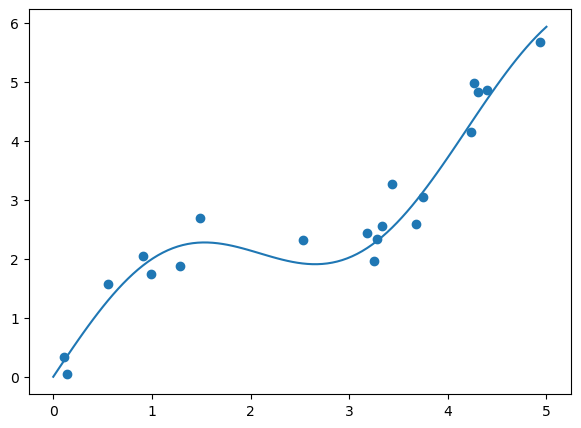

In [2]:

# Plot
plt.figure(figsize=(7, 5))
plt.scatter(x_sample, y_sample, label='y(x)')
x_grid = np.linspace(0, 5, 100)
plt.plot(x_grid, f(x_grid), label='f(x)')

plt.show()

- We can see in the figure above and the mse output that as the model complexity increases the estimators first are underfitting and then overfitting. The best estimator is learned with a degree of 5, all estimators with degree < 5 underfit and all with a degree > 5 tend torwards overfitting.

# Generate 100 Datasets & Estimate Coefficients
Generate 100 datasets (each of size 50) by randomly sampling from y.

Estimate the coefficients of each of the four estimators using the sampled dataset.

In [3]:
from collections import defaultdict
from sklearn.metrics import mean_squared_error

# Setting up variables for simulation
n_datasets = 100
test_size = 10
train_size = 50
# polynomial_degrees = [1, 3, 10]
x_grid = np.linspace(0, 5, test_size)

polynomial_degrees = range(1, 15)


error_dict = defaultdict(list)
bias_dict = defaultdict(list)
variance_dict = defaultdict(list)

pred_test = defaultdict(list)
test_errors = defaultdict(list)


def sample_filtered(size, exclude:np.array=None):
    if exclude is None:
       return np.random.uniform(0, 5, size=size)

    while True:
        sample = np.random.uniform(0, 5, size=size)
        # check if any of the sample is in the exclude list
        if np.any(np.isin(sample, exclude)):
            continue
        return sample

def error_function(pred, actual):
    return (pred - actual) ** 2


# Preparing the fixed test set

x_test = sample_filtered(test_size)
y_test = f(x_test)

# Simulating datasets and capturing fits
for _ in range(n_datasets):
    # Generating training data
    x_train = sample_filtered(train_size, x_test)
    y_train = sample_fx_data(x_train, noise_std=0.3)

    for degree in polynomial_degrees:
        # Fitting model
        theta_hat = np.polyfit(x_train, y_train, degree)
        y_pred_test = np.polyval(theta_hat, x_test)


        pred_test[degree].append(y_pred_test)

        test_errors[degree].append(error_function(y_pred_test, y_test))



# Fit Estimators and Calculate Bias, Variance, and Error
Fit the estimators of varying complexity using the training set for each dataset. Then calculate and plot the squared bias, variance, and error on the testing set for each of the estimators.

In [4]:


def calculate_estimator_bias_squared(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (E[g(x)] - f(x))^2, averaged across all trials
    return np.mean((average_model_prediction - f(x_test)) ** 2)


def calculate_estimator_variance(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (g(x) - E[g(x)])^2, averaged across all trials
    return np.mean((pred_test - average_model_prediction) ** 2)

complexity_test_error = []
bias_squared = []
variance_test = []
error_test = []

for degree in polynomial_degrees:
    # Compute the bias and variance
    pred_test_degree = np.array(pred_test[degree])

    bias_squared.append(calculate_estimator_bias_squared(pred_test_degree))
    variance_test.append(calculate_estimator_variance(pred_test_degree))

    # Compute the test error
    error_test.append(np.mean(test_errors[degree]))

    # Compute the complexity test error
    complexity_test_error.append(bias_squared[-1] + variance_test[-1])

best_model_degree = polynomial_degrees[np.argmin(complexity_test_error)]

print(f"Best model degree: {best_model_degree}")

Best model degree: 5


# Plot Bias, Variance, and Error
Plot the tradeoff between bias and variance with model complexity.

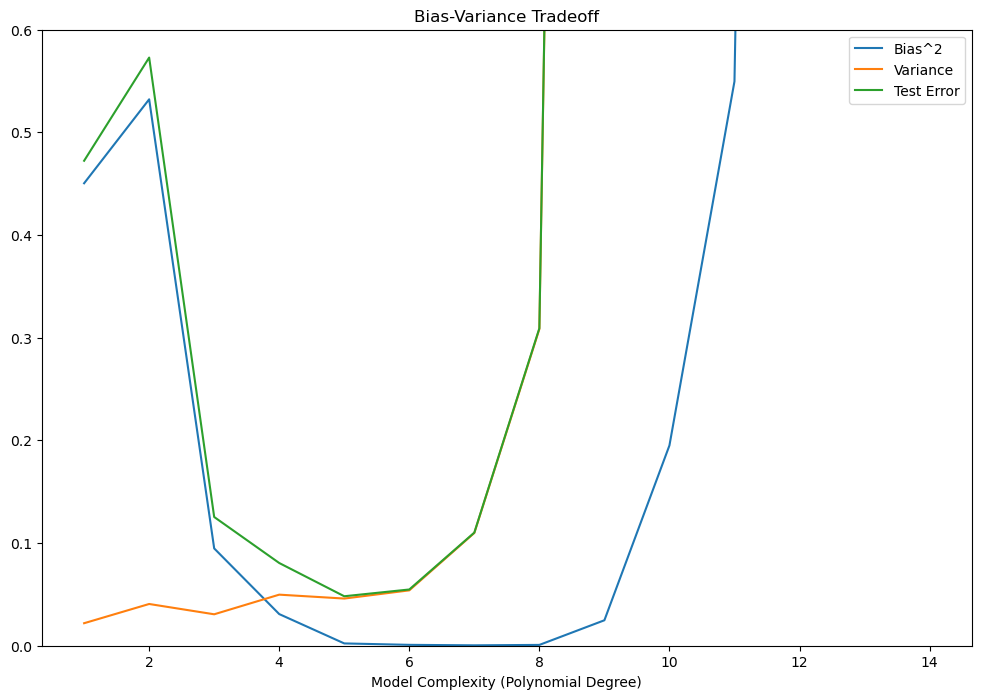

In [5]:
plt.figure(figsize=(12, 8))

error_test = np.array(bias_squared) + np.array(variance_test)
plt.plot(polynomial_degrees, bias_squared, label='Bias^2')
plt.plot(polynomial_degrees, variance_test, label='Variance')
plt.plot(polynomial_degrees, error_test, label='Test Error')

plt.xlabel('Model Complexity (Polynomial Degree)')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.ylim(0, .6)
plt.show()


# KNN Hyperparameter Tuning Using Cross Validation

This notebook focuses on hyperparameter tuning for the KNN algorithm using cross-validation. It evaluates the performance of different configurations on a social network ads dataset.

## Overview
The key steps involve training a KNN classifier, performing cross-validation to tune hyperparameters, and analyzing the results.

## Procedure
- **Model Training**: Train a KNN classifier with \( K = 4 \) and \( p = 2 \), and evaluate its performance.
- **Hyperparameter Tuning**: Perform 5-fold cross-validation to identify the best value of K for \( p = 1 \) and \( p = 2 \).
- **Performance Analysis**: Compare the misclassification error for different values of K and determine the best combination of K and p.

## Preprocess Social Network Data

In [6]:
import pandas as pd

df = pd.read_csv(r'./Social_Network_Ads.csv')
display(df.head())

X = df.iloc[:, [1, 2, 3]].values
y = df.iloc[:, -1].values

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Encode binary `Gender` column

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

Test-Train Split 80/20

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 0)

Scale/de-mean

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Train KNN Classifier
With K = 4 and p = 2 train a KNN classifier.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

Evaluate its misclassification error, Accuracy, Precision, Recall, and F-1 score on the test set

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(f'KNN with k=5, p=2 w/ minkowski\n')

y_pred = classifier.predict(X_test)

accuracy = sum((y_pred == y_test))/len(y_test)
print(f"Accuracy: {accuracy}")

precision = sum((y_pred == y_test) & (y_pred == 1)) / sum(y_pred == 1)
print(f"Precision: {precision}")

recall = sum((y_pred == y_test) & (y_pred == 1)) / sum(y_test == 1)
print(f"Recall: {recall}")

f1 = 2 * (precision * recall) / (precision + recall)
print(f"F1: {f1}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

KNN with k=5, p=2 w/ minkowski

Accuracy: 0.95
Precision: 0.875
Recall: 0.9545454545454546
F1: 0.9130434782608695
Confusion Matrix:
[[55  3]
 [ 1 21]]


### The model performed well with an accuracy of 0.95

## Part 2
Using 5-fold cross-validation, identify the best value of K with p=1 (Manhattan distance), calculating the misclassification error for K in [1, 2, ..., 15] and plotting it as a function of K.


p=1, folds=5, scoring_metric='accuracy', k_values=range(1, 16)

 Optimal K: 10
 MSE @ k=10: 0.0969


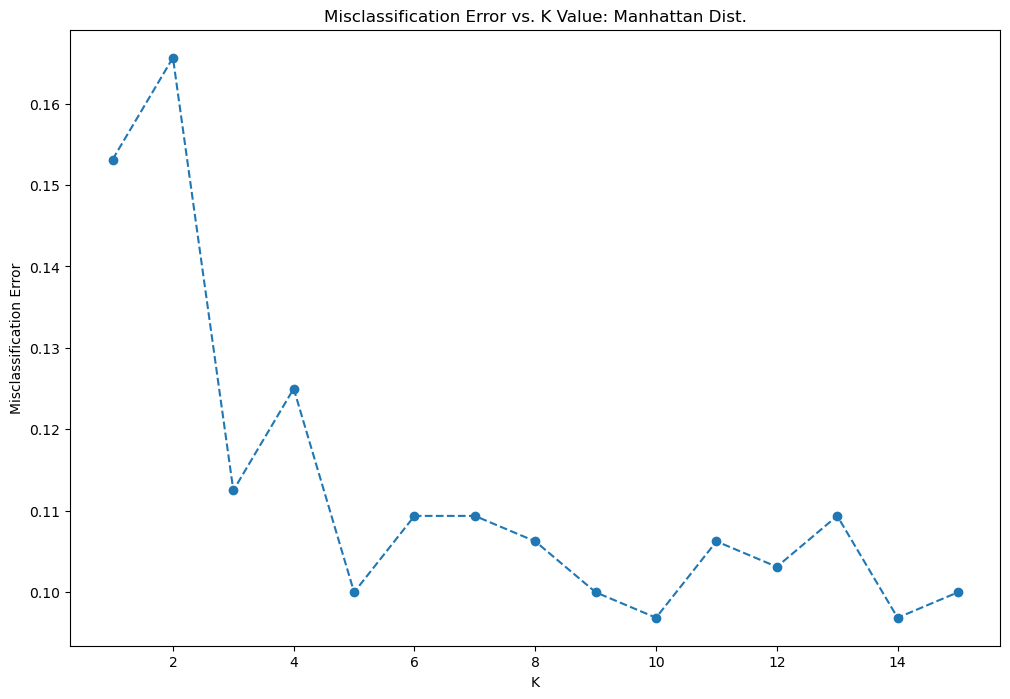

In [12]:
from sklearn.model_selection import cross_val_score

p = 1
folds = 5
scoring_metric = 'accuracy'
k_values = range(1, 16)
cv_scores = []
print(f"{p=}, {folds=}, {scoring_metric=}, {k_values=}")

for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p)
    scores = cross_val_score(classifier, X_train, y_train, cv=folds, scoring=scoring_metric)
    cv_scores.append(scores.mean())

# Plot misclassification error vs k
MSE = [1 - x for x in cv_scores]
optimal_k_idx = k_values[MSE.index(min(MSE))]
optimal_k = k_values[np.argmin(MSE)]
print(f"\n Optimal K: {optimal_k}\n MSE @ k={optimal_k}: {min(MSE):.4f}")


plt.figure(figsize=(12, 8))
plt.plot(k_values, MSE, marker='o', linestyle='dashed')
plt.title('Misclassification Error vs. K Value: Manhattan Dist.')
plt.xlabel('K')
plt.ylabel('Misclassification Error')

plt.show()



## Part 3
Repeat part 2 with p=2 (Euclidean distance), plotting the misclassification error as a function of K in the same graph as for p=1.


p=2, folds=5, scoring_metric='accuracy', k_values=range(1, 16)

 Optimal K: 10
 MSE @ k=10: 0.1000


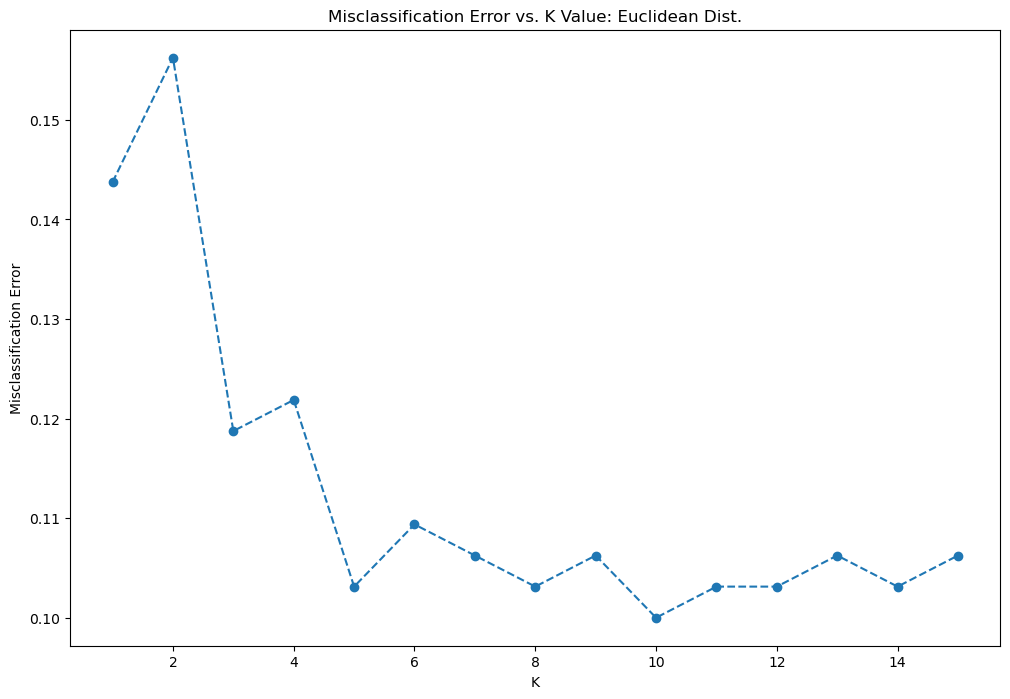

In [13]:
p = 2
folds = 5
scoring_metric = 'accuracy'
k_values = range(1, 16)
cv_scores = []
print(f"{p=}, {folds=}, {scoring_metric=}, {k_values=}")

for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p)
    scores = cross_val_score(classifier, X_train, y_train, cv=folds, scoring=scoring_metric)
    cv_scores.append(scores.mean())

# Plot misclassification error vs k
MSE = [1 - x for x in cv_scores]
optimal_k_idx = k_values[MSE.index(min(MSE))]
optimal_k = k_values[np.argmin(MSE)]
print(f"\n Optimal K: {optimal_k}\n MSE @ k={optimal_k}: {min(MSE):.4f}")


plt.figure(figsize=(12, 8))
plt.plot(k_values, MSE, marker='o', linestyle='dashed')
plt.title('Misclassification Error vs. K Value: Euclidean Dist.')
plt.xlabel('K')
plt.ylabel('Misclassification Error')

plt.show()


## Part 4
Determine the best value of K for both Euclidean and Manhattan distances, and discuss which combination of p and K gives the best classifier based on the minimum misclassification error.

Manhattan Distance with K=10 gives the best classifier with a MSE with @ k=10: 0.0969. On the other hand, the best classifier with Euclidean Distance is also K=10 but with a slightly higher MSE of 0.1000. The Manhattan distance is the best classifier for this dataset + hyperparameter configuration.